# Breast Cancer Diagnosis by Machine Learning 
## Written by : Peng Xu (Github: pxu25)
### Github:https://github.com/pxu25/BrestCancerPredictor/blob/master/Breast%20Cancer.ipynb
### If you fail to see the file in Github, try this linking.            https://nbviewer.jupyter.org/github/pxu25/BrestCancerPredictor/blob/master/Breast%20Cancer.ipynb
### Datasouce: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
### Objectives: Build up a model to predict breast cancer malignant or benign 

### Summary:
#### To predict breast cancer malignant or benign, I use FNA data with 596 records and 33 features. First, I deploy python statistics and data visualization tools like matplotlib, seaborn to understand the dataset basic info. Then, I choosse 18 features using data clean and feature engineering functions based on the clues from first step. I select four classic machine learning classification models (LogisticRegression(L1), LogisticRegression(L2), GrandientBoosting and RandomForest) to train the data with cross-validation. Both RandomForest and GreadintBoosting become the winner model (AUC > .98). Finally, I packed RandomForest model and save it into the file.

### Steps:
    1. Background
    2. Basic info of dataset
    3. Data cleaning and feature engineering
    4. Train and evaluate the models
    5. Save the winnder model as file

# 1. Background
#### Breast cancer is cancer that develops from breast tissue. Signs of breast cancer may include a lump in the breast, a change in breast shape, dimpling of the skin, fluid coming from the nipple, a newly inverted nipple, or a red or scaly patch of skin. In those with distant spread of the disease, there may be bone pain, swollen lymph nodes, shortness of breath, or yellow skin.
#### Physical examination and mammography are commonly used for screen. But fine needle aspiration and cytolog(FNAC) to help establish the diagnosis and classfication.
#### The dataset are feature measurements extracted from a digitized image of a fine needle aspirate (FNA) of a breast mass.
#### Attribute Information:

 - 1) ID number 
 - 2) Diagnosis (M = malignant, B = benign) 
 - 3) Ten real-valued features are computed for each cell nucleus:
  - a) radius (mean of distances from center to points on the perimeter) 
  - b) texture (standard deviation of gray-scale values) 
  - c) perimeter 
  - d) area 
  - e) smoothness (local variation in radius lengths) 
  - f) compactness (perimeter^2 / area - 1.0) 
  - g) concavity (severity of concave portions of the contour) 
  - h) concave points (number of concave portions of the contour) 
  - i) symmetry 
  - j) fractal dimension ("coastline approximation" - 1)

-  The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

# 2. Basic information of dataset
  - Load the data into pandas dataframe
  - Dataset shape like the columns and row numbers
  - Missing data for each features
  - Numberic and catogrical distribution
  - Features segmentation

### 2.1 Import the library and load the data

In [1]:
# import the nessacery modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load the data
df = pd.read_csv("data.csv")

## 2.2 dataset shape by shape and info function


In [3]:
df.shape

(569, 33)

In [4]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [5]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [6]:
df.tail(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,NaN
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,NaN
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,NaN
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,NaN
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,NaN
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

## 2.3 Distributions of numeric and catogrical features

###  Distrubition of numeric features

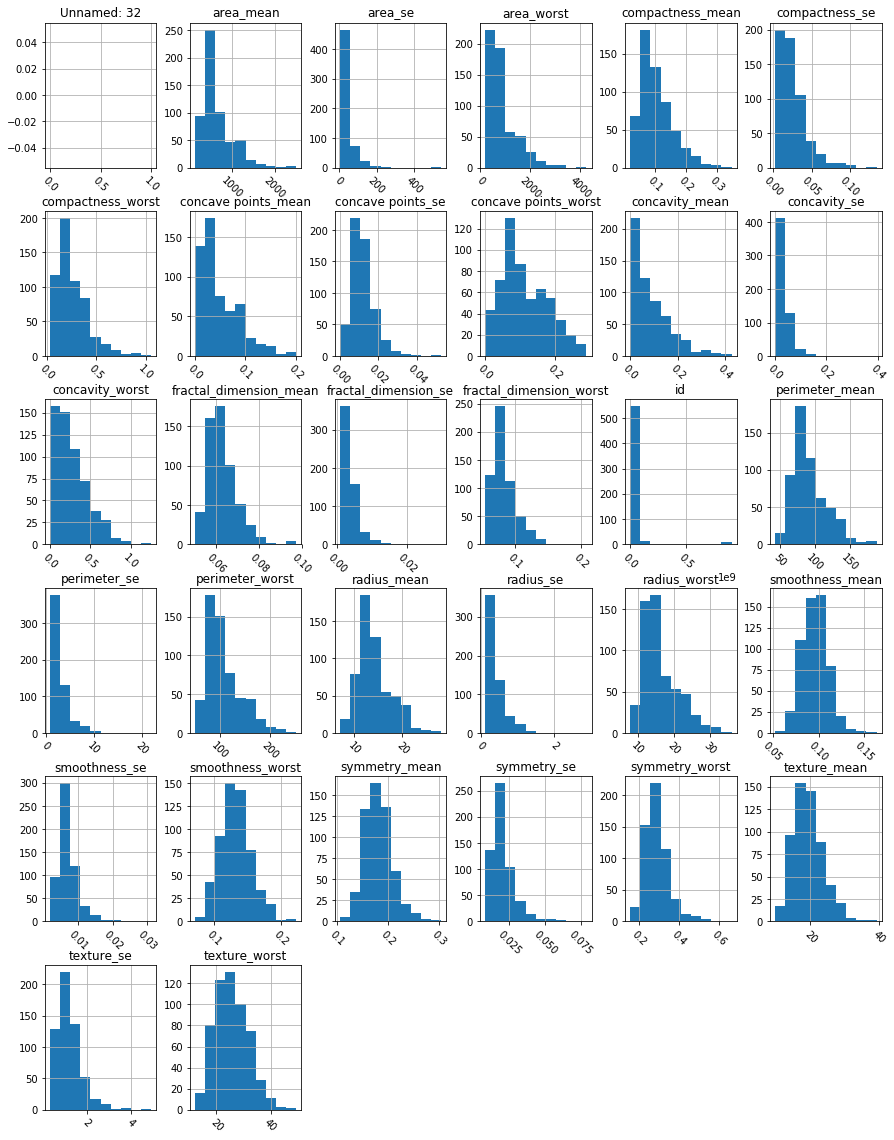

In [8]:
# Plot histogram grid
df.hist(figsize=(15,20),xrot=-45)
# Clear the text "residue"
plt.show()

In [9]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [10]:
df.describe(include=['object'])

,diagnosis
count,569
unique,2
top,B
freq,357


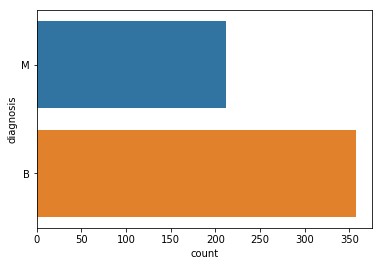

The malignant percentage is  37.26%


In [11]:
sns.countplot(y='diagnosis', data=df)
plt.show()
m_percertange = 100*len(df.loc[df['diagnosis'] == 'M'])/len(df)
print("The malignant percentage is ", str(round(m_percertange,2)) + '%')

##  2.4  Segmentations

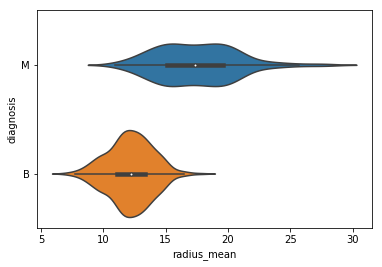

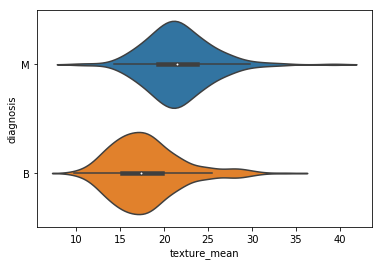

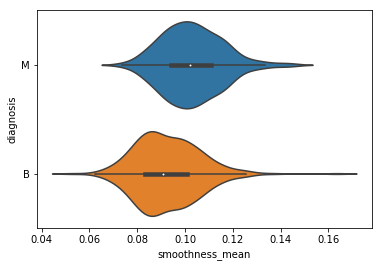

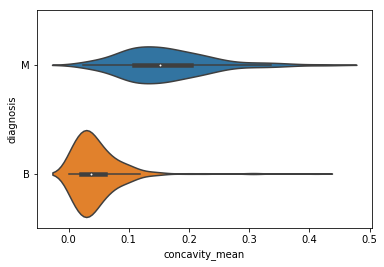

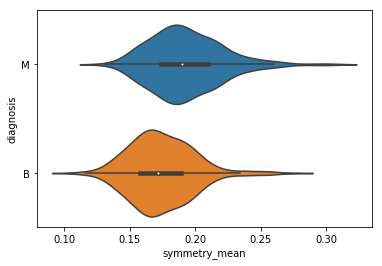

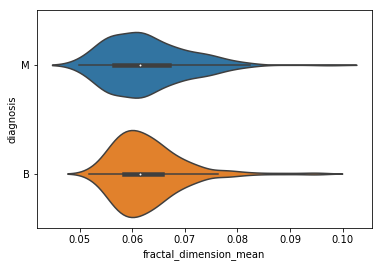

In [12]:
# Segment radius_mean by diagnosis
sns.violinplot(y='diagnosis', x='radius_mean', data=df)
plt.show()
sns.violinplot(y='diagnosis', x='texture_mean', data=df)
plt.show()
sns.violinplot(y='diagnosis', x='smoothness_mean', data=df)
plt.show()
sns.violinplot(y='diagnosis', x='concavity_mean', data=df)
plt.show()
sns.violinplot(y='diagnosis', x='symmetry_mean', data=df)
plt.show()
sns.violinplot(y='diagnosis', x='fractal_dimension_mean', data=df)

### From the basic analysis, we know
- The dataset have 32 features with 569 rows
- All of features are numeric but the output variable is binary varibles (Malignant and Benign)
- The radius, texture, smothness,concavity obviouse are seperated by M and B. But we need to check if symmetry and fractal dimension also associated to M and B.

# 3. Data processing and feature engineering
- Data cleaning
- Feature enginerring

## 3.1 Data cleaning
#### We notice there are a null column (column 33) and will drop it. Also the id is not useful for our prediction.

In [13]:
df = df.drop_duplicates()
df.shape

(569, 33)

In [14]:
filter_data = ["id","Unnamed: 32" ]
df= df.drop(filter_data, axis = 1)
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 3.2 Fetures engineering

#### First we exam if the variable is associated with breast cancer by t test

In [15]:
# create a function to cal all of feature p value for malignant and benign, output the p>0.05 
def pvalues(df):
    from scipy import stats
    columns = df.columns[1:]
    for i in columns:
        v1 = df[i][df.diagnosis=='M']
        v2 = df[i][df.diagnosis=='B']
        statistic, pvalue= stats.ttest_ind(v1,v2)
        if pvalue > 0.05:
            print(str(i) + ' pvalue: ' + str(pvalue))

In [16]:
pvalues(df)

fractal_dimension_mean pvalue: 0.7599368037256238
texture_se pvalue: 0.8433320287670163
smoothness_se pvalue: 0.11029660865789295
symmetry_se pvalue: 0.8766418183858812
fractal_dimension_se pvalue: 0.06307355082239346


In [17]:
df = df.drop(['fractal_dimension_mean', 'texture_se','smoothness_se','symmetry_se','fractal_dimension_se'], axis = 1)

In [18]:
df.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.679090,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,0.275869,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.691765,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.732562,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.301467,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.497473,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.631925,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.698050,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.303379,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
radius_se,0.679090,0.275869,0.691765,0.732562,0.301467,0.497473,0.631925,0.698050,0.303379,1.000000,...,0.715065,0.194799,0.719684,0.751548,0.141919,0.287103,0.380585,0.531062,0.094543,0.049559


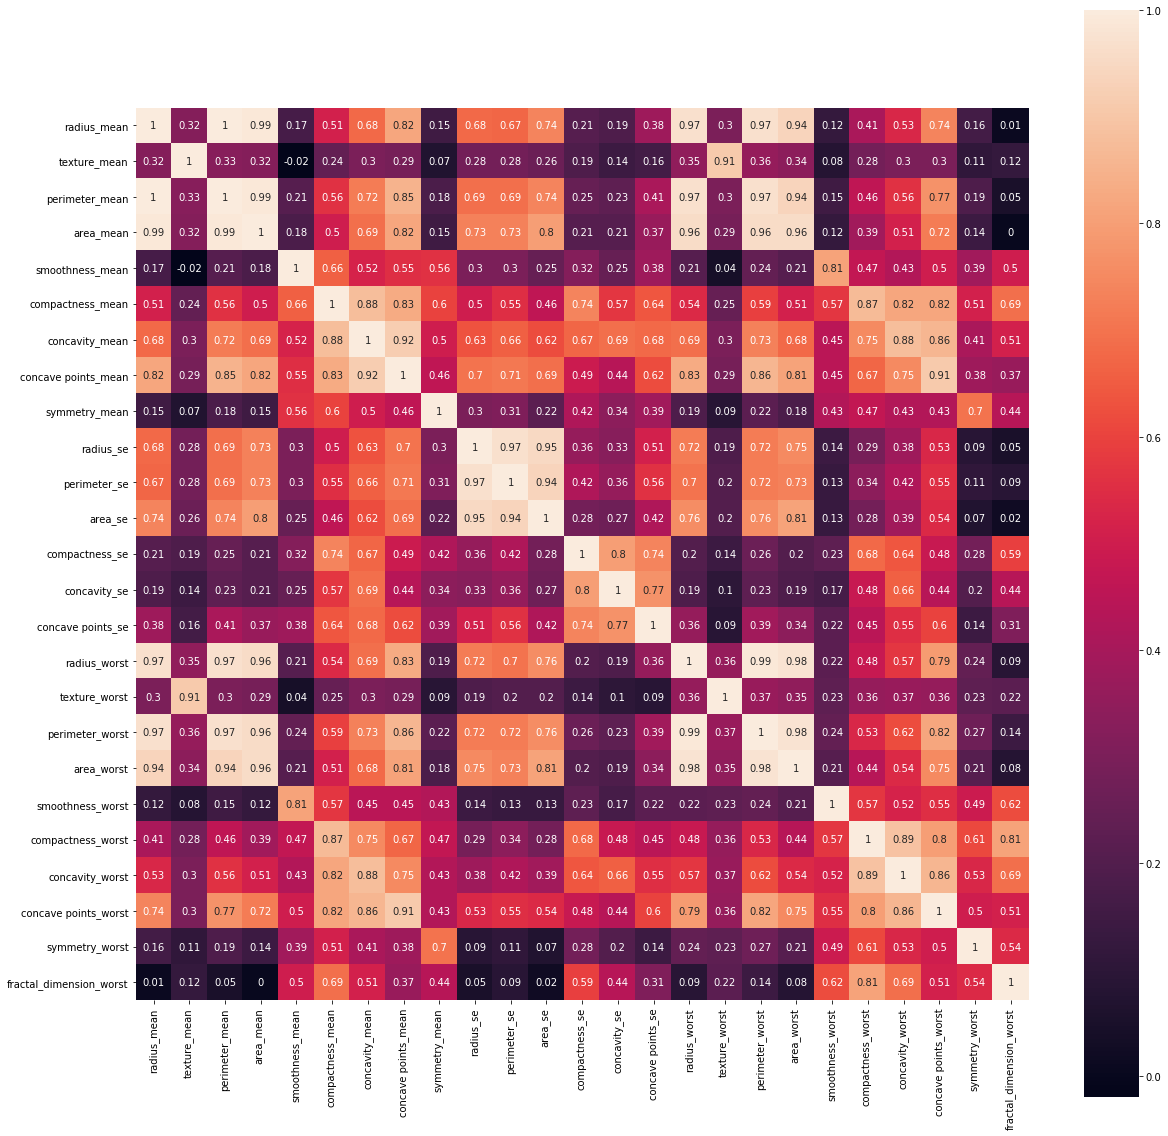

In [19]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data=round(df.corr(),2), annot = True,  square = True, ax=ax)
plt.show()

In [20]:
df_clean = df.drop(['perimeter_mean', 'area_mean','radius_worst','perimeter_worst','area_worst','texture_worst','concave points_worst'], axis = 1)

### Higher correlation coefficient means there are multiplecollinearity, which cause the high variance. We can limit the effects by transfer the data with PCA.

In [21]:
# import the PCA from scikitlearn
from sklearn.decomposition import PCA

In [22]:
df_features = df.drop('diagnosis', axis = 1)
df_PCA = PCA(df_features)

In [23]:
df_PCA

PCA(copy=True, iterated_power='auto',
  n_components=     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0         17.990         10.38          122.80     1001.0          0.11840
1         20.570         17.77          132.90     1326.0          0.08474
2         19.690         21.25          130.00     12...    0.07820
567                  0.12400
568                  0.07039

[569 rows x 25 columns],
  random_state=None, svd_solver='auto', tol=0.0, whiten=False)

## 3.3 Transfer dummy variables and save the file 

In [24]:
# We will take M(malignant) as 1
df_clean['diagnosis'] = pd.get_dummies(df.diagnosis ).M

In [25]:
df_clean.diagnosis.mean()

0.37258347978910367

In [26]:
# Save analytical base table
df_clean.to_csv('analytical_base_table.csv', index=None)

# 4. Model 
- Confirm the target variable
- Logistic Regression with L1 regulation
- Logistic Regression with L2 regulation
- Gradiant Boosting
- Rondom Forest

In [27]:
raw_df = pd.read_csv('data.csv')
raw_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [48]:
abt_df = pd.read_csv('analytical_base_table.csv')
abt_df.shape

(569, 19)

### Load the model

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [30]:
# Function for splitting training and test set
from sklearn.model_selection import train_test_split 

# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

# For standardization
from sklearn.preprocessing import StandardScaler

# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

# Classification metrics (added later)
from sklearn.metrics import roc_curve, auc

# Pickle for saving model files
import pickle

In [31]:
df = pd.read_csv('analytical_base_table.csv')

### 4.1 Split the dataset

In [32]:
# target variable
y = df.diagnosis
# input features
X = df.drop('diagnosis', axis=1)


# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234,
                                                    stratify=df.diagnosis)

# Print number of observations in X_train, X_test, y_train, and y_test
print( len(X_train), len(X_test), len(y_train), len(y_test) )

455 114 455 114


### 4.2 Model pipline

In [33]:
pipelines = {
    'l1' : make_pipeline(StandardScaler(), 
                         LogisticRegression(penalty='l1' , random_state=123)),
    'l2' : make_pipeline(StandardScaler(), 
                         LogisticRegression(penalty='l2' , random_state=123)),
    'rf' : make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123))
}

### 4.3 hyperparameters tuning

In [34]:
# Regression hyperparameters
l1_hyperparameters = {
    'logisticregression__C' : np.linspace(1e-3, 1e3, 10),
}

l2_hyperparameters = {
    'logisticregression__C' : np.linspace(1e-3, 1e3, 10),
}

In [35]:
# Random Forest hyperparameters
rf_hyperparameters = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33]
}

In [36]:
# Boosted Tree hyperparameters
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [1, 3, 5]
}

In [37]:
# Create hyperparameters dictionary
hyperparameters = {
    'l1' : l1_hyperparameters,
    'l2' : l2_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}

### 4.4 fit the model with cross-validation

In [38]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

l1 has been fitted.
l2 has been fitted.
rf has been fitted.
gb has been fitted.


### 4.5 Evaluate metrics

In [39]:
# Display best_score_ for each fitted model
for name, model in fitted_models.items():
    print(name, model.best_score_ )

l1 0.9604395604395605
l2 0.9626373626373627
rf 0.9494505494505494
gb 0.9648351648351648


### 4.6  AUC (area under ROC curve)

In [40]:
# Classification metrics
from sklearn.metrics import roc_curve, auc
pred = fitted_models['l1'].predict(X_test)

In [41]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Display confusion matrix for y_test and pred
print( confusion_matrix(y_test, pred) )

[[65  7]
 [ 3 39]]


In [42]:
# define a funtion to return fpr and trp
def roc_matrix(name):
    pred = fitted_models[name].predict_proba(X_test)
    pred = [p[1] for p in pred]
    fpr, trp, _ = roc_curve(y_test, pred)
    return fpr, trp;

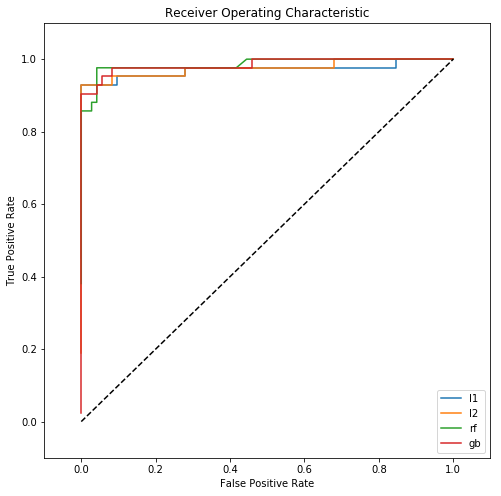

In [43]:
# Initialize figure
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(roc_matrix('l1')[0], roc_matrix('l1')[1], label='l1')
plt.plot(roc_matrix('l2')[0], roc_matrix('l2')[1], label='l2')
plt.plot(roc_matrix('rf')[0], roc_matrix('rf')[1], label='rf')
plt.plot(roc_matrix('gb')[0], roc_matrix('gb')[1], label='gb')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [44]:
names = ['l1','l2','rf','gb']
# Calculate AUROC
for name in names:
    auc_score = auc(roc_matrix(name)[0], roc_matrix(name)[1]) 
    print(name + ' ' + str(auc_score) )

l1 0.9708994708994709
l2 0.9751984126984127
rf 0.9851190476190476
gb 0.9847883597883598


# 5. Save model file

In [49]:
# Save winning model as final_model.pkl
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)

In [50]:
# Open the model
with open('final_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [52]:
model

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min...imators=100, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False))])